In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px



In [131]:
df = pd.read_csv('student_performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


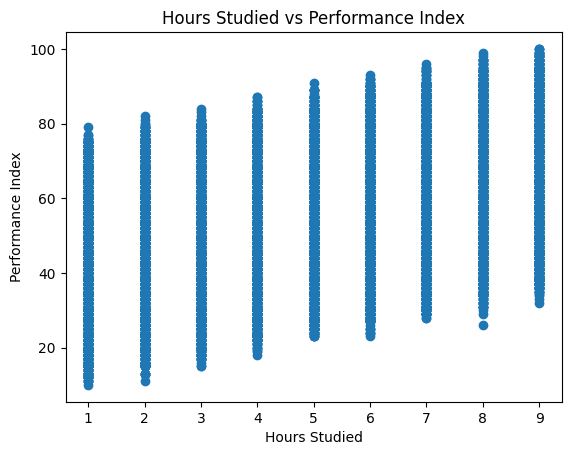

In [132]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()


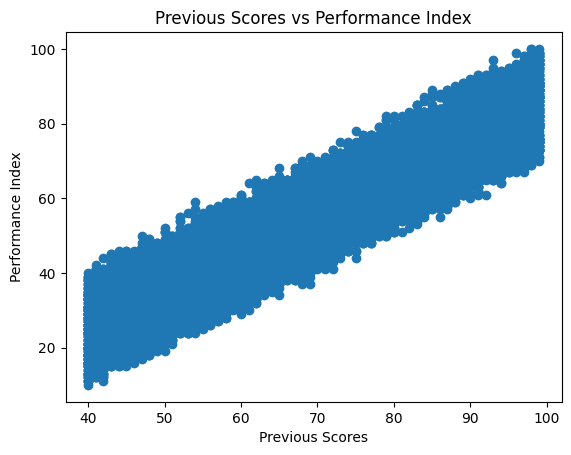

In [133]:
plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.show()

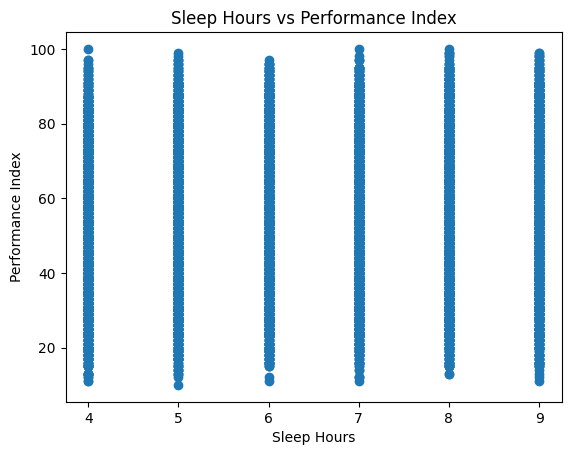

In [134]:
plt.scatter(df['Sleep Hours'], df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sleep Hours vs Performance Index')
plt.show()


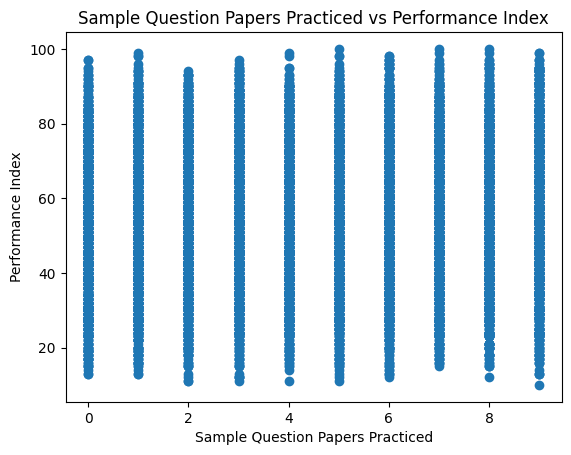

In [135]:
plt.scatter(df['Sample Question Papers Practiced'], df['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.show()

In [136]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [137]:
#Realizar la estandarización de datos correspondiente para que los datos tengan la misma escala.
from sklearn.preprocessing import normalize
df_temp = df.drop(columns=['Performance Index', 'Extracurricular Activities'])
df_scaled = normalize(df_temp)
df_scaled = pd.DataFrame(df_scaled, columns=df_temp.columns)

df_scaled['Extracurricular Activities'] = df['Extracurricular Activities']
df_scaled['Performance Index'] = df['Performance Index']
df_scaled.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities,Performance Index
0,0.070239,0.993383,0.090308,0.010034,1,91.0
1,0.048650,0.997334,0.048650,0.024325,0,65.0
2,0.153449,0.978240,0.134268,0.038362,1,45.0
3,0.095208,0.990162,0.095208,0.038083,1,36.0
4,0.092209,0.987955,0.105382,0.065864,0,66.0


Linear Regression

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_scaled.drop(columns=['Performance Index'])
y = df_scaled['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [124]:
X_train.shape, X_test.shape, X_validation.shape

((6000, 5), (2000, 5), (2000, 5))

In [125]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
c = lr.intercept_
c

-1384.3916024394382

In [127]:
m = lr.coef_
m

array([ 1.97702697e+02,  1.45301111e+03, -1.28953231e+02,  4.84378458e+01,
        5.88730830e-01])

In [128]:
Y_pred_test = lr.predict(X_test)
Y_pred_test


array([20.52907919, 62.83363227, 50.46161164, ..., 67.46610538,
       44.76865632, 27.77121738])

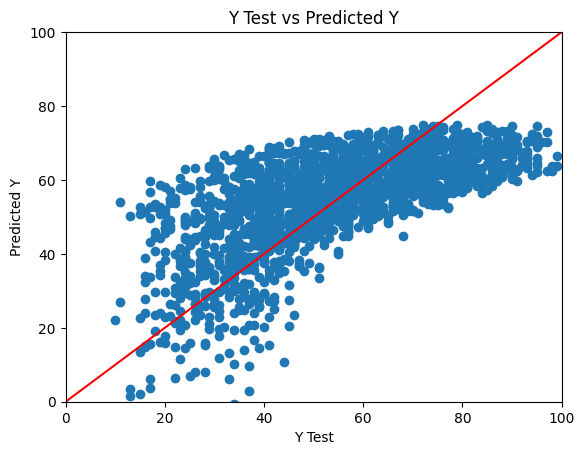

In [129]:
plt.scatter(y_test, Y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()


Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

Y_pred_test_rf = rf.predict(X_test)
Y_pred_test_rf

array([43.7975    , 55.36666667, 41.806     , ..., 68.7725    ,
       35.24      , 18.755     ])

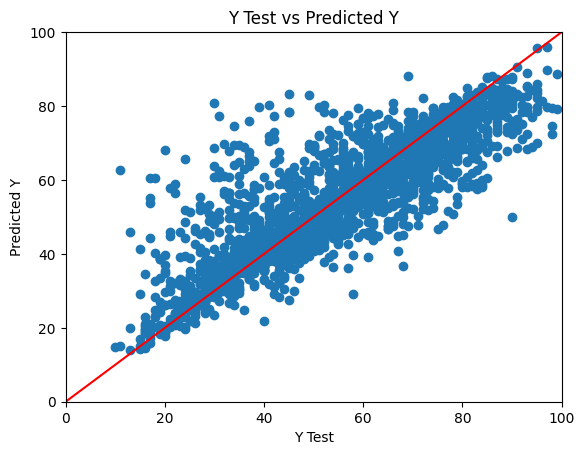

In [140]:
plt.scatter(y_test, Y_pred_test_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()

In [142]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

Y_pred_test_dt = dt.predict(X_test)
Y_pred_test_dt


array([39. , 41. , 44. , ..., 55. , 48. , 17.5])

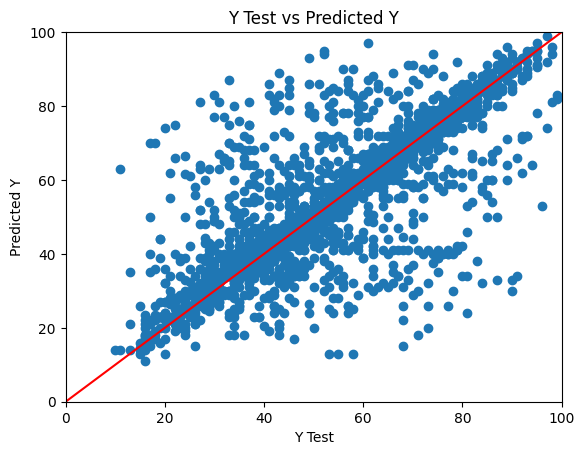

In [143]:
plt.scatter(y_test, Y_pred_test_dt)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()